In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
X=pd.read_csv('dataCredit.csv')
X=X.drop('CUST_ID', axis=1)
X.fillna(method='ffill', inplace=True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [4]:
X.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.394205,1733.143852,865.225790,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.616165,2895.063757,2376.929826,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.488256,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.096808,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,815.375602,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
scaler=StandardScaler()
X_s=scaler.fit_transform(X)
X_norm=pd.DataFrame(normalize(X_s))

In [6]:
pca=PCA(n_components=2)
X_principial=pca.fit_transform(X_norm)
X_principial=pd.DataFrame(X_principial)
X_principial.columns=['P1','P2']

In [7]:
db_model=DBSCAN(eps=0.05,min_samples=10).fit(X_principial)
labels=db_model.labels_

In [8]:
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [9]:
np.histogram(labels, bins=len(np.unique(labels)))

(array([  39, 8903,    8], dtype=int64),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]))

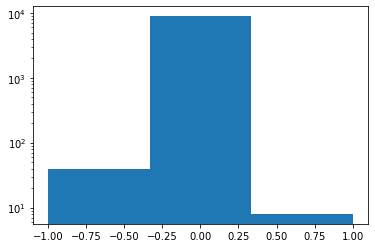

In [10]:
plt.hist(labels,bins=len(np.unique(labels)),log=True)
plt.show()

In [11]:
n_clusters=len(np.unique(labels))-1
anomaly=list(labels).count(-1)
print(f'Cluster: {n_clusters}')
print(f'Abnormal points: {anomaly}')

Cluster: 2
Abnormal points: 39


In [12]:
X_anomaly=X.iloc[np.argwhere(labels==-1).reshape((-1,))]
X_anomaly.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
86,7069.950386,1.0,1603.78,1445.14,158.64,5626.004046,1.0,0.833333,1.000000,0.750000,23,23,11000.0,4589.873897,1876.262988,0.000000,12
87,8181.251131,1.0,2258.01,1318.78,939.23,5251.228934,1.0,0.750000,1.000000,0.750000,21,60,13500.0,3021.575846,2074.581541,0.000000,12
109,6644.201651,1.0,4478.75,2721.59,1757.16,7205.520805,1.0,0.916667,1.000000,0.583333,21,64,9000.0,10857.943210,2469.571326,0.083333,12
120,8504.876253,1.0,6724.26,4100.08,2624.18,1686.599777,1.0,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.000000,12
468,6426.639738,1.0,4462.86,2816.46,1646.40,4599.625146,1.0,0.833333,0.916667,0.333333,11,103,11800.0,1793.043228,3101.017030,0.000000,12


In [13]:
X_principial['R']=labels

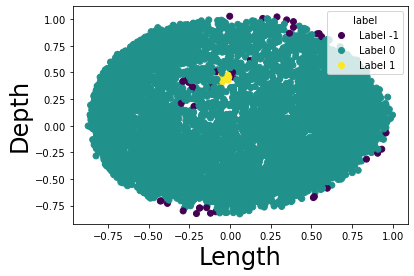

In [14]:
sp_names = ['Label -1', 'Label 0', 'Label 1']
scatter=plt.scatter(X_principial['P1'],X_principial['P2'],c=X_principial.R.astype('category').cat.codes)
plt.xlabel("Length", size=24)
plt.ylabel("Depth", size=24)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="label")
plt.show()